# Introductory Econometrics with Python
## Carlos Góes (andregoes@gmail.com)

# 1. Averages can be deceitful
## 1.1. Distributions: mean, variance, and standard deviation

Averages are everywhere. An average is a single summary statistic we use for a number of observations. More formally, a mean (which is a more technical term we use for averages) is the expected value for the central tendency of a random variable. This means that the most likely value of a given variable is its mean ($\mu$):

\begin{equation}
\mu_{x} = \frac{1}{N} \sum_{i=1}^N x_{i} = \frac{x_{1} + x_{2} + ... + x_{N}}{N}
\end{equation}

As such, averages can be quite useful. For instance, you can compare yourself to your fellow classmates by contrasting your performance to the average grade across students in a classroom. Or we can compare the expected value for the height distribution of the population of South Koreans (i.e., the average height of South Koreans) to the expected value for the height distribution of the population of North Koreans and draw inferences on why the averages are different.

However, as useful as averages can be, they can also be quite deceitful. For once, averages say very little about the shape of the its distribution. On average, Shaquille O'Neal (7'1") and I (5'6") are quite tall: 6 feet and 3 inches. But, of course, that does not change the fact that I am short.

Let's compare two distributions centered around the same mean (0), but with different degrees of variability around such mean. Note that if you look only at their means, you would not find any differences between them. However, when you contrast them in the chart below, you can intuitively see they are not quite the same.

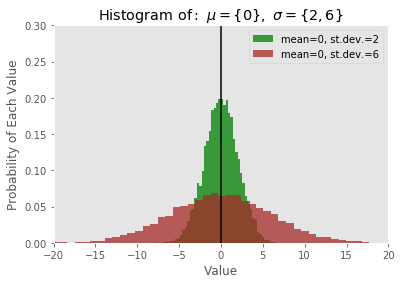

In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234) # set seed  

mu = 0  # this is the average of the distribution
sigma = 2 # this is the standard deviation of the distribution
draws = 10000 # this is the number of simulated observations in each sample
bins = 50 # this is the number of bins in the histogram

# Draw two sets of random numbers of mean mu & std deviation sigma

y = np.random.normal(mu,sigma,draws)
x = np.random.normal(mu,3*sigma,draws)

# Plot each one of them

hist1 = plt.figure()

plt.hist(y, # the variable you're plotting
         bins=bins, # the number of bins
         normed=True, # normalized such that sum of probabilities = 1
         facecolor='green', # color of distribution
         alpha=0.75,
         label="mean=0, st.dev.=2") # degree of transparency of the plot

plt.hist(x, # the variable you're plotting
         bins=bins, # the number of bins
         normed=True, # normalized such that sum of probabilities = 1
         facecolor='brown', # color of distribution
         alpha=0.75,
         label="mean=0, st.dev.=6") # degree of transparency of the plot

plt.axvline(mu, color='black') # vertical line at the mean

plt.legend(loc=1)
plt.xlabel('Value') 
plt.ylabel('Probability of Each Value')  
plt.title(r'$\mathrm{Histogram\ of:}\ \mu=\{0\},\ \sigma=\{2,6\}$')
plt.axis([-20, 20, 0, 0.3])  # set range of axes
plt.grid(False)  # add grid
plt.show()  # plot chart

Although they have the same means, the green distribution is much "tighter" than the brown one. Note that about 20% of the observations of the green distribution are clustered around its mean, while only 5% of the observation of the brown distribution are close to zero.

If their means are the same, how can we describe the differences between these two distributions? By another measure, which we call variance.

The variance is the average squared sum of the differences between each observation and the mean of the distribution. The larger this number is, the more spread out a distribution will be:

\begin{equation}
    Var(x) = \sigma^2 =  \frac{1}{N} \sum_{i=1}^N (x_{i} - \mu_{x})^2 = \frac{(x_{1} - \mu_x)^2 + ... + (x_{N} - \mu_x)^2}{N}
\end{equation}

Another way of referring to the same "tightness" characteristic is to mention the standard deviation of the distribution. The standard deviation is simply defined as the square root of the its variance: $\sigma = \sqrt{\sigma^2}$.

Like the variance, the standard deviation is a measure of dispersion of a distribution. The lower its value, the closer to the mean data points tend to be. The main advantage of the standard deviation is that it is expressed in the same units as the underlying data, so that we can use it as a benchmark to check which share of the distribution we expect to fall around each distance of the mean.

## 1.2. Populations and Samples

For instance, every ten years the U.S. Census Bureau tries to collect information on everybody who lives in America. The Census is a complicated and expensive endeavor -- which means that it is financially and logistically unfeasible to have a Census every year.

In order to keep track of the trends in the U.S. population whenever complete Census data are not available, the U.S. government relies on the Current Population Survey, which selects a representative sample -- i.e., a share of the population -- of the U.S. population several times a year.

As long as the sampling process is unbiased and representative, the sample estimates will be very similar to the true population statistics. However, even for unbiased samples, they are still estimates. Statistics such as the average and the standard deviation of the sample will depend on which individuals are ultimately sampled -- and there will be a degree of uncertainty around them.

For instance, observe the difference between the distribution of a normally distributed population and a representative unbiased sample below. You will notice that, even though the distribution of the sample seems to mimic the distribution of the population in shape and frequency, it is not identical to it.

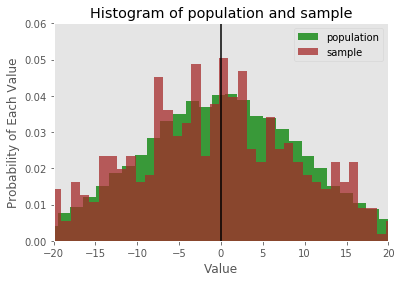

In [34]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 10
pop_size = 10000
sample_size = 500
bins = 50

population = np.random.normal(mu, sigma, pop_size)
sample = np.random.choice(population, size=sample_size)

hist2 = plt.figure()

plt.hist(population, # the variable you're plotting
         bins=bins, # the number of bins
         normed=True, # normalized such that sum of probabilities = 1
         facecolor='green', # color of distribution
         alpha=0.75,
         label="population") # degree of transparency of the plot

plt.hist(sample, # the variable you're plotting
         bins=bins, # the number of bins
         normed=True, # normalized such that sum of probabilities = 1
         facecolor='brown', # color of distribution
         alpha=0.75,
         label="sample") # degree of transparency of the plot

plt.axvline(mu, color='black') # vertical line at the mean

plt.legend(loc=1)
plt.xlabel('Value') 
plt.ylabel('Probability of Each Value')  
plt.title('Histogram of population and sample')
plt.axis([-20, 20, 0, 0.06])  # set range of axes
plt.grid(False)  # add grid
plt.show()  # plot chart

In fact, if you select ten different random samples of this population, you will arrive at ten slightly different estimated means. The figure below shows estimated means for ten random samples of the same population (in red) and the degree of uncertainty around these estimates (in black). Note that all estimated means are different, but they are all close to the true population mean (zero).

Sample 1, mean: 0.000621909
Sample 2, mean: -0.155025
Sample 3, mean: 0.452077
Sample 4, mean: 0.225527
Sample 5, mean: 0.465987
Sample 6, mean: -0.678059
Sample 7, mean: 0.386533
Sample 8, mean: -0.52489
Sample 9, mean: 0.329436
Sample 10, mean: -0.0457076


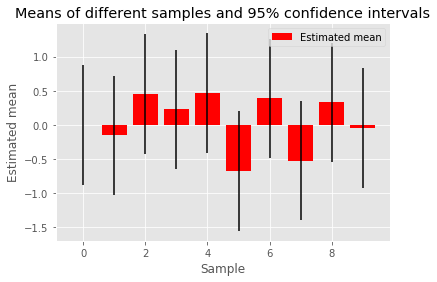

In [35]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 10
nsamples = 10
sample_size = 500

population = np.random.normal(mu, sigma, pop_size)

sample = np.matrix([[0 for x in range(nsamples)] for y in range(sample_size)])

means = []
ses = []

for i in range(nsamples):
    s = np.random.choice(population, size=sample_size)
    sample[:,i] = np.transpose(np.matrix(s))
    mean = s.mean()
    se = 1.96 * (sigma / np.sqrt(sample_size))
    ses.append(se)
    means.append(mean)
    print("Sample " + str(i+1) + ", mean: %g" % (mean) )

bmeans = plt.figure()

plt.bar(range(nsamples), means, color='red', yerr=ses, label='Estimated mean')

plt.legend(loc=1)
plt.xlabel('Sample') 
plt.ylabel('Estimated mean')  
plt.title('Means of different samples and 95% confidence intervals')

plt.show()

How uncertain are these estimates? It will depend on two things: the degree of dispersion in the sample (as measured by the sample's standard deviation - $s$) and the number of observations in your sample ($n$). The larger the standard deviation of the population, the more uncertain will be the mean estimate. The larger the sample size, the less uncertain will be the estimate. 

These relationships are summarized in the equation for the standard error of the mean ($s_\mu$) below:

\begin{equation}
    s_\mu = \frac{s}{\sqrt{n}} 
\end{equation}

In the plot below, we compare the standard errors of the means of two samples, one with $s=10$ and the other with $s=30$, as the number of observations increase. While the standard errors can be quite large if the sample is small, it rapidly decreases and converges asymptotically towards zero as the sample grows. If the same is large enough, the standard error of the mean will be small even if the sample standard deviation is large.

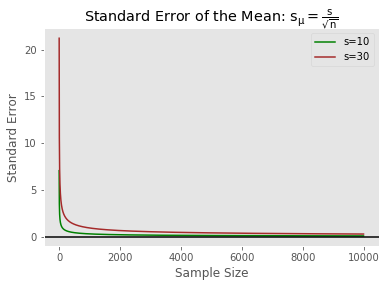

In [36]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10

nn = np.linspace(2,10000,num=10000)
se1,se2 = [],[]
for n in nn:
    se1.append(sigma / np.sqrt(n))
    se2.append(3*sigma / np.sqrt(n))

seplot = plt.figure()
    
plt.plot(nn, se1, color='green', label='s=10')
plt.plot(nn, se2, color='brown', label='s=30') 

plt.axhline(y=0, color='black')

plt.legend(loc=1)
plt.xlabel('Sample Size') 
plt.ylabel('Standard Error')  
plt.title('Standard Error of the Mean: ' r'$\mathrm{ s_\mu = \frac{s}{\sqrt{n}}}$')
plt.grid(False)  # add grid
plt.show()  # plot chart

## 1.3. Normal (and abnormal) distributions: means, medians, and modes

You probably noticed that all of the distributions we used so far resemble what is commonly known as the bell curve. The technical name for the bell curve is the normal distribution (or the Gaussian distribution). The normal distribution is \textit{normal} because the occurrence of distributions that resemble it in real life is fairly common. For instance, if you measure the height distribution of all Americans, the result will be a bell shaped curve.

The normal distribution is so common because of what statisticians call the central limit theorem (CLT). The CLT states that if you collect a large enough set of independent and identically distributed (\textit{i.i.d.}) variables, the sum of such variables will be normally distributed. And since in many instances there are independent events (i.e., not correlated to other identical events) - say, the size measurement error of tailors working at the same factory -, its distribution will tends towards a normal distribution.

The normal distribution has several important important characteristics. First, we know that exactly 68\% of the observations will fall within one standard deviation from the mean in either direction; 95\% will fall within two standard deviations; and virtually all observations will fall within three standard deviations. These are good benchmarks to know how unlikely any observation is as compared to similar variables.

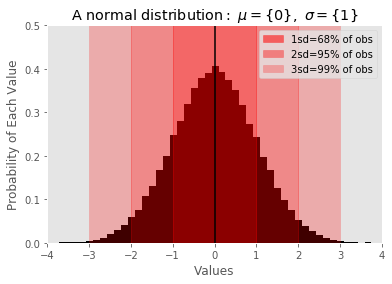

In [37]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0  
sigma = 1 
draws = 100000 
bins = 50 


y = np.random.normal(mu,sigma,draws)

hist3 = plt.figure()

plt.hist(y, 
         bins=bins, 
         normed=True,
         facecolor='black', 
         alpha=1) 

# main shaded area
plt.axvspan(xmin=-1,xmax=1,color='red',alpha=.55, label='1sd=68% of obs')

# second shaded area
plt.axvspan(xmin=-2,xmax=-1,color='red',alpha=.4, label='2sd=95% of obs')
plt.axvspan(xmin=1,xmax=2,color='red',alpha=.4)

# third shaded area
plt.axvspan(xmin=-3,xmax=-2,color='red',alpha=.25, label='3sd=99% of obs')
plt.axvspan(xmin=2,xmax=3,color='red',alpha=.25)

# black line
plt.axvline(x=0, color='black')

plt.legend(loc=1)
plt.xlabel('Values') 
plt.ylabel('Probability of Each Value')  
plt.title(r'$\mathrm{A\ normal\ distribution:}\ \mu=\{0\},\ \sigma=\{1\}$')
plt.axis([-4, 4, 0, 0.5])  # set range of axes
plt.grid(False)  # add grid
plt.show()  # plot chart

Another characteristic of the normal distribution is that it is symmetric: its mean (the expected value), median (the value that splits the distribution in two halves), and mode (the most common variable) have the same value. But this needs not be the case.

Not all distributions are born equal. If a distribution is non-normal, its mean can be influenced by extreme values on either side of the distribution - which means, that other metrics (such as the mode or the median) can be more useful statistics.

For instance, income distributions tend to not be normal. Since there is usually a few people who make much more money than the average Joe, the income distribution is usually tilted to the left, with a longer right tail (it usually resembles what a lognormal distribution).

When that is the case, mode, median, and mean will have different values. The mean is influenced by the incomes of the very rich and will usually be higher than the median. If the incomes of the top 1\% of the population goes up and everyone else's remains unchanged, the mean income - but not the median income - will go up. That is the reason why it is very common for we to track the welfare of the typical household in a country by tracking the median (not the mean) real household income.

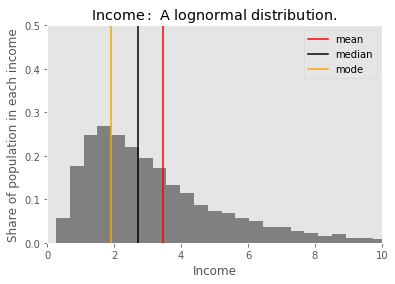

In [38]:
import numpy as np
import matplotlib.pyplot as plt

mu = 1  
sigma = .7 
draws = 10000 
bins = 100

y = np.random.lognormal(mu,sigma,draws)

mean, median = np.mean(y), np.median(y)

hist4 = plt.figure()

count, binz, ignore = plt.hist(y, 
         bins=bins, 
         normed=True,
         facecolor='grey', 
         alpha=1) 

counter = 0
for number in count:
    counter = counter + 1
    if number == count.max():
        index = counter
        
mode = binz[index]

plt.axvline(x=mean, color='red', label='mean')
plt.axvline(x=median, color='black', label='median')
plt.axvline(x=mode, color='orange', label='mode')

plt.legend(loc=1)
plt.xlabel('Income') 
plt.ylabel('Share of population in each income')  
plt.title(r'$\mathrm{Income:\ A\ lognormal\ distribution.}$')
plt.axis([0, 10, 0, 0.5])  # set range of axes
plt.grid(False)  # add grid
plt.show()  # plot chart